In [16]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json 
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [17]:
df = pd.read_csv('VTI2.csv')

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-28,99.059998,99.129997,96.800003,96.940002,88.092087,5606400
1,2015-09-29,97.230003,97.839996,96.370003,96.919998,88.073914,4548600
2,2015-09-30,98.110001,98.790001,97.550003,98.720001,89.709618,3747800
3,2015-10-01,98.959999,99.120003,97.709999,98.919998,89.891350,3808800
4,2015-10-02,97.959999,100.370003,97.379997,100.360001,91.199936,3654500


In [19]:
def convert_dates(df, date_column, replace_index, time_zone='CET'):
    df[date_column] = pd.to_datetime(df[date_column], utc=True).dt.tz_convert(time_zone)
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    if replace_index == False:
        return df
    else:
        df.index = df[date_column]
        return df

In [20]:
df = convert_dates(df, "Date", True)

In [21]:
# Prophet must have a very rigid format: 
# a column named ds for the points in time and another named y for the target.
# where ds is a day point, if we have pont four hour we need to sum all
# and get the sum of the day

#df_clean = df_clean.resample('d').sum()
df['ds'] = df.index.values
df.index = range(0, len(df))
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['ds'] = df.ds.dt.date
#df['ds'] = df.Date

df = df.rename(columns={'Close':'y'})

df = df[['ds', 'y']]

Note that you will need to remove weekends from your future dataframe. Failing to do so will give you bad forecast results. For more info on this, see here or here. 

In [10]:
from fbprophet import Prophet

train_size = 252*3                     # Use 3 years of data as train set
val_size = 252                         # Use 1 year of data as validation set
train_val_size = train_size + val_size # Size of train+validation set
i = train_val_size                     # Day to forecast
H = 21                                 # Forecast horizon

# Fit prophet model
m = Prophet()
m.fit(df[i-train_val_size:i])

# Create dataframe with the dates we want to predict
future = m.make_future_dataframe(periods=2*H)

# Eliminate weekend from future dataframe
future['day'] = future['ds'].dt.weekday
future = future[future['day']<=4]

# Predict
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


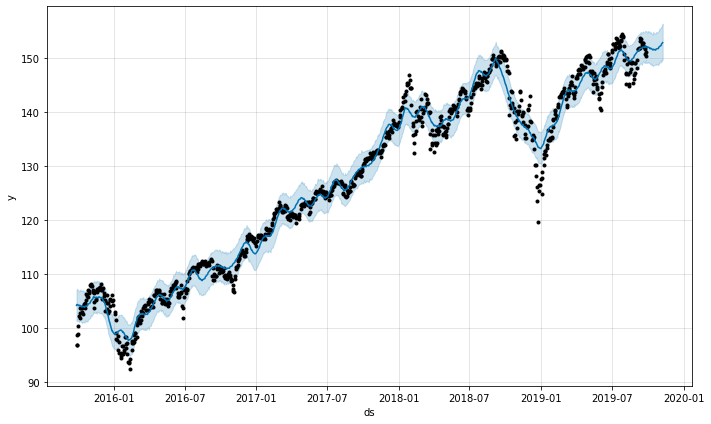

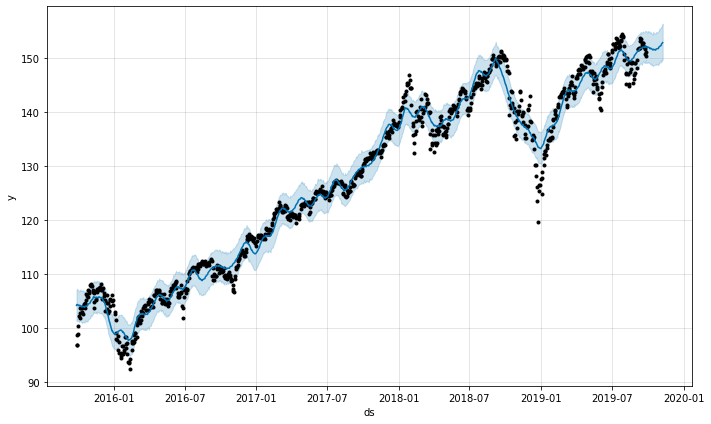

In [12]:
m.plot(forecast)

In [22]:
# Changepoint prior scale can be set in Prophet as such:
m = Prophet(changepoint_prior_scale=1)

In [23]:
m.fit(df[i-train_val_size:i])

# Create dataframe with the dates we want to predict
future = m.make_future_dataframe(periods=2*H)

# Eliminate weekend from future dataframe
future['day'] = future['ds'].dt.weekday
future = future[future['day']<=4]

# Predict
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


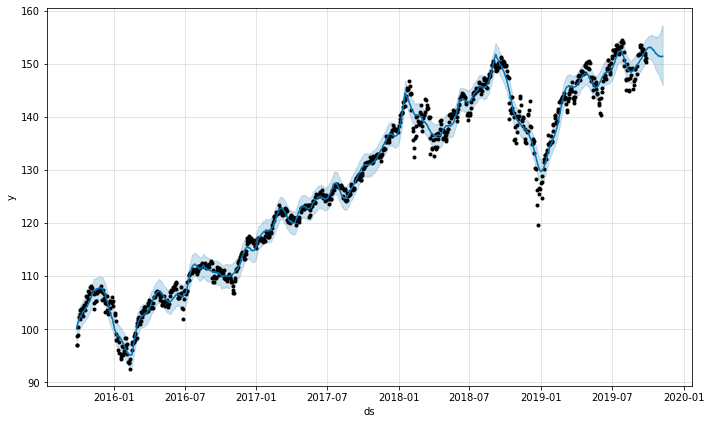

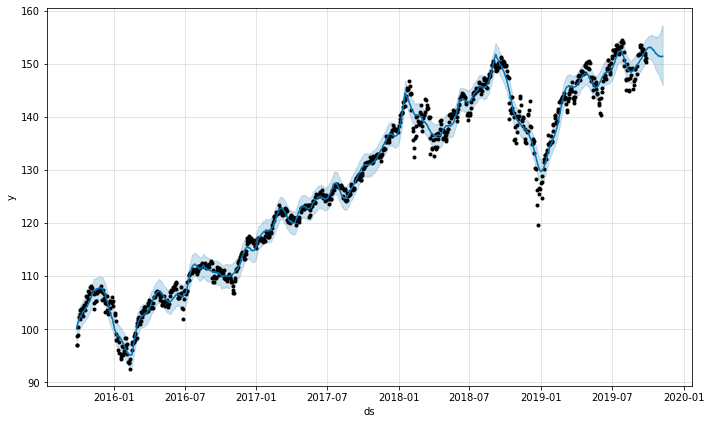

In [24]:
m.plot(forecast)

In [25]:
m = Prophet()
m.add_seasonality(name='monthly', period=21, fourier_order=fourier_order)

NameError: name 'fourier_order' is not defined